In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chardet

# Detect encoding
with open('spam.csv', 'rb') as file:
    result = chardet.detect(file.read())
    print(result['encoding'])


Windows-1252


In [3]:
df = pd.read_csv('spam.csv',encoding='Windows-1252')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

<b> 1.Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 cols
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis='columns')
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
# rename columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
# check duplicate values
df.duplicated().sum()

403

In [12]:
# remove duplicates
df = df.drop_duplicates(keep='first')
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.shape

(5169, 2)

<b>Exploratory Data Analysis(EDA)

In [14]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1f881114ec0>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

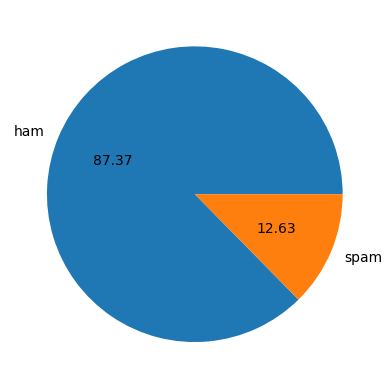

In [15]:
import matplotlib.pyplot as plt
labels = ['ham','spam']
sizes = df['target'].value_counts()
plt.pie(sizes,labels=labels,autopct = "%0.2f")

In [16]:
from sklearn.model_selection import train_test_split
# Splitting the data to train and test
X_train,X_test,y_train,y_test=train_test_split(df['text'],df.target,test_size=0.25)

In [17]:
len(X_train)

3876

In [18]:
len(X_test)

1293

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
v = CountVectorizer()

In [21]:
X_train_count = v.fit_transform(X_train.values)
X_train_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [22]:
from sklearn.naive_bayes import MultinomialNB

In [23]:
model = MultinomialNB()

In [24]:
model.fit(X_train_count,y_train)

MultinomialNB()

In [25]:
X_test_count = v.transform(X_test)
model.score(X_test_count, y_test)

0.9822119102861562

In [26]:
from sklearn.pipeline import Pipeline

In [27]:
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [28]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [29]:
clf.score(X_test,y_test)

0.9822119102861562

In [30]:
clf.predict(['Hey mohan, can we get together to watch footbal game tomorrow?'])

array([0])

In [31]:
clf.predict(['Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'])

array([1])

In [32]:
import pickle

In [33]:
pickle.dump(clf,open('clf.pkl','wb'))

In [34]:
with open('clf.pkl', 'rb') as file:
    clf_loaded = pickle.load(file)

In [35]:
clf_loaded.predict(['Hey mohan, can we get together to watch footbal game tomorrow?'])

array([0])

In [36]:
clf_loaded.predict(['Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!'])

array([1])